# 鋭角三角形が作られる確率
# 2023年6月25日　日曜数学会

<img width="1000" src="pic4.png">


  


# Twitterでの投稿
https://twitter.com/mathlava/status/1414370006473723907

<img width="1000" src="pic1.png">


# 鋭角三角形とは

https://mathwords.net/donkakusankakukei


<img width="700" src=pic2.png">




# 任意に2点を取って，3点目をどこに取るかということを考えて,その面積比で確率を考えることにしました。

  
<img width="700" src="pic3.png">



## 単位円の円周上に3点を取る。100万回作って鋭角三角形の割合を調べます。0と1の間の乱数$r_b$作り，単位円周上の点を$P(\cos 2r_b \pi,\,\sin 2r_b \pi)$としました。


In [4]:
n=1000000   #100万回
k=0
for i=1:n
    b1=rand(1);a1=[cos(2*π*b1[1]),sin(2*π*b1[1])]  #単位円周上に1点目
    b1=rand(1);a2=[cos(2*π*b1[1]),sin(2*π*b1[1])]  #単位円周上に2点目
    b1=rand(1);a3=[cos(2*π*b1[1]),sin(2*π*b1[1])]  #単位円周上に3点目
    x1=a2-a1;x2=a3-a1;t1=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 1つ目の角のcos
    x1=a1-a2;x2=a3-a2;t2=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 2つ目の角のcos
    x1=a1-a3;x2=a2-a3;t3=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 3つ目の角のcos
    if t1>0.0000001  && t2>0.0000001 && t3>0.0000001 # 3つの角が鋭角という条件
        k+=1 # 条件を満たしたらカウントする。
    end
end
println(k*100/n,"%")

25.0383%


# 単位円の円周を$N$等分して3点を選ぶとき，鋭角三角形となる確率

- $N=2n$のとき

円周の$2n$個の点から3個選ぶ。$\frac{2n(2n-1)(2n-2)}6$個。

鋭角三角形となるのは$\frac{n(n-1)(n-2)}3$個。


よって，確率は

$$\frac{2n(n-1)(n-2)}{2n(2n-1)(2n-2)}=\frac{n-2}{2(2n-1)}\xrightarrow[n\to \infty]{}\frac14$$



- $N=2n+1$のとき

円周の$2n+1$この点から3個選ぶ。$\frac{(2n+1)(2n)(2n-1)}6$個。

鋭角三角形となるのは$\frac{n(n+1)(2n+1)}6$個。


よって，確率は

$$\frac{n(n+1)(2n+1)}{(2n+1)(2n)(2n-1)}=\frac{n+1}{2(2n-1)}\xrightarrow[n\to \infty]{}\frac14$$

## 単位円の内部ににランダムに3点を取ります。100万回作って鋭角三角形の割合を調べます。0と1の間の2つの乱数$r_a$，$r_b$作り，単位円の内部の点を$P(r_a\cos 2r_b \pi,\,r_a\sin 2r_b \pi)$としました。


In [6]:
n=1000000   #100万回
k=0
for i=1:n
    b1=rand(2);a1=[b1[1]*cos(2*π*b1[2]),b1[1]*sin(2*π*b1[2])]  # 1点目
    b1=rand(2);a2=[b1[1]*cos(2*π*b1[2]),b1[1]*sin(2*π*b1[2])]  # 2点目
    b1=rand(2);a3=[b1[1]*cos(2*π*b1[2]),b1[1]*sin(2*π*b1[2])]  # 3点目
    x1=a2-a1;x2=a3-a1;t1=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 1つ目の角のcos
    x1=a1-a2;x2=a3-a2;t2=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 2つ目の角のcos
    x1=a1-a3;x2=a2-a3;t3=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 3つ目の角のcos
    if t1>0.0000001  && t2>0.0000001 && t3>0.0000001 # 3つの角が鋭角という条件
        k+=1 # 条件を満たしたらカウントする。
    end
end
println(k*100/n,"%")

24.2941%


## 円の内部に2000個点をランダムに取ってみる。

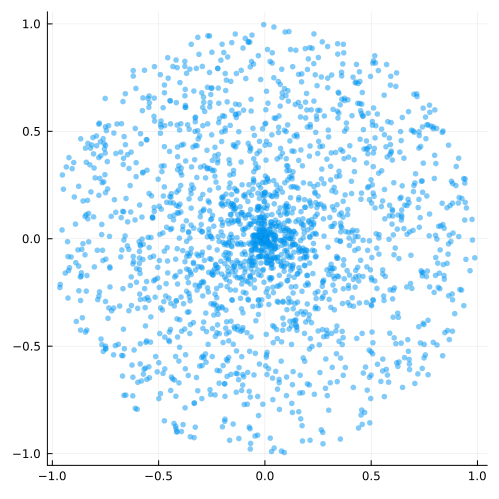

In [7]:
using Plots #Plotsパッケージ

D=rand(2000)
R=rand(2000)
M=[R[i]*cos(D[i]*2*pi) for i=1:length(D)]
N=[R[i]*sin(D[i]*2*pi) for i=1:length(D)]

scatter(M,N,legend=false, msw=0, ms=3, alpha=0.5, size=(500, 500))

## 単位円の内部ににランダムに3点を取ります。100万回作って鋭角三角形の割合を調べます。（その2）0と1の間の2つの乱数$r_a$，$r_b$作り，単位円の内部の点を$P(\sqrt{r_a}\cos 2r_b \pi,\,\sqrt{r_a}\sin 2r_b \pi)$としました。

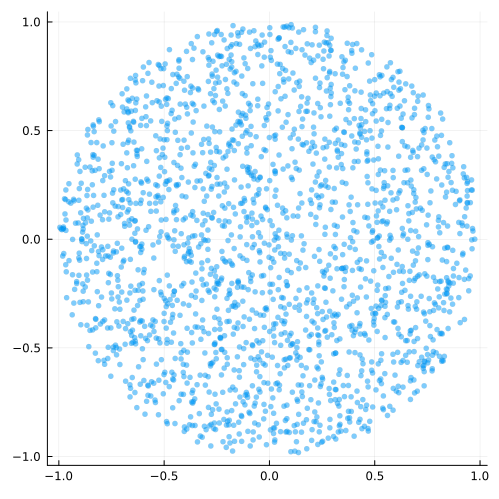

In [8]:
using Plots #Plotsパッケージ

D=rand(2000)
R=rand(2000)
M=[sqrt(R[i])*cos(D[i]*2*pi) for i=1:length(D)]
N=[sqrt(R[i])*sin(D[i]*2*pi) for i=1:length(D)]

scatter(M,N,legend=false, msw=0, ms=3, alpha=0.5, size=(500, 500))

In [10]:
n=1000000   #100万回
k=0
for i=1:n
    b1=rand(2);a1=[sqrt(b1[1])*cos(2*π*b1[2]),sqrt(b1[1])*sin(2*π*b1[2])]  # 1点目
    b1=rand(2);a2=[sqrt(b1[1])*cos(2*π*b1[2]),sqrt(b1[1])*sin(2*π*b1[2])]  # 2点目
    b1=rand(2);a3=[sqrt(b1[1])*cos(2*π*b1[2]),sqrt(b1[1])*sin(2*π*b1[2])]  # 3点目
    x1=a2-a1;x2=a3-a1;t1=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 1つ目の角のcos
    x1=a1-a2;x2=a3-a2;t2=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 2つ目の角のcos
    x1=a1-a3;x2=a2-a3;t3=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 3つ目の角のcos
    if t1>0.0000001  && t2>0.0000001 && t3>0.0000001 # 3つの角が鋭角という条件
        k+=1 # 条件を満たしたらカウントする。
    end
end
println(k*100/n,"%")

28.0581%


## 1x1の正方形の内部にランダムに3点を取ります。100万回作って鋭角三角形の割合を調べます。　0と1の間の2つの乱数$r_a$，$r_b$作り，正方形の内部の点を$P(r_a,\,r_b)$としました。

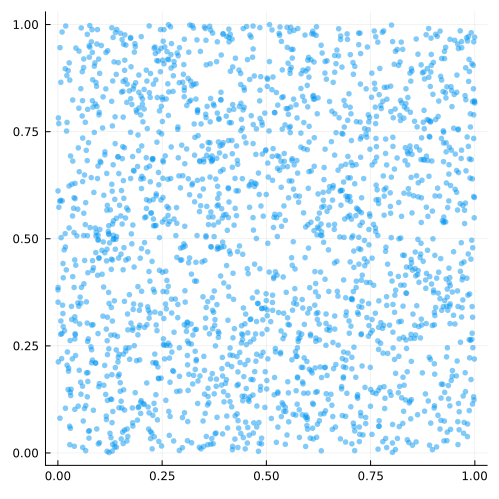

In [11]:
using Plots #Plotsパッケージ

D=rand(2000)
R=rand(2000)
M=[R[i] for i=1:length(D)]
N=[D[i] for i=1:length(D)]

scatter(M,N,legend=false, msw=0, ms=3, alpha=0.5, size=(500, 500))

In [12]:
n=1000000 #100万回
k=0
for i=1:n
    a1=rand(2);a2=rand(2);a3=rand(2) #3点ランダムにとる。
    x1=a2-a1;x2=a3-a1;t1=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 1つ目の角のcos
    x1=a1-a2;x2=a3-a2;t2=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 2つ目の角のcos
    x1=a1-a3;x2=a2-a3;t3=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 3つ目の角のcos
    if t1>0.0000001  && t2>0.0000001 && t3>0.0000001 # 3つの角が鋭角という条件
        k+=1 # 条件を満たしたらカウントする。
    end
end
println(k*100/n,"%")

27.4276%


## 正規乱数を使って，平面上に3点とり，100万回作って鋭角三角形の割合を調べます。2つの正規乱数$r_a$，$r_b$作り，平面上の点を$P(r_a,\,r_b)$としました。

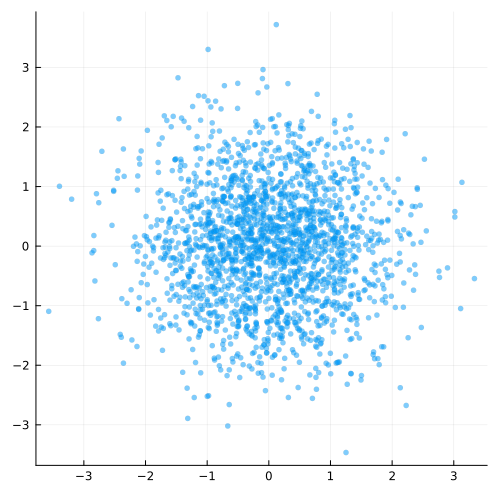

In [13]:
using Plots #Plotsパッケージ

D=randn(2000)
R=randn(2000)
M=[R[i] for i=1:length(D)]
N=[D[i] for i=1:length(D)]

scatter(M,N,legend=false, msw=0, ms=3, alpha=0.5, size=(500, 500))

In [15]:
n=1000000 #100万回
k=0
for i=1:n
    a1=randn(2);a2=randn(2);a3=randn(2) #3点ランダムにとる。
    x1=a2-a1;x2=a3-a1;t1=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 1つ目の角のcos
    x1=a1-a2;x2=a3-a2;t2=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 2つ目の角のcos
    x1=a1-a3;x2=a2-a3;t3=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 3つ目の角のcos
    if t1>0.0000001  && t2>0.0000001 && t3>0.0000001 # 3つの角が鋭角という条件
        k+=1 # 条件を満たしたらカウントする。
    end
end
println(k*100/n,"%")

25.0275%


## 指数分布に従う乱数を使って，平面上に3点とり，100万回作って鋭角三角形の割合を調べます。2つの指数乱数$r_a$，$r_b$作り，平面上の点を$P(r_a,\,r_b)$としました。

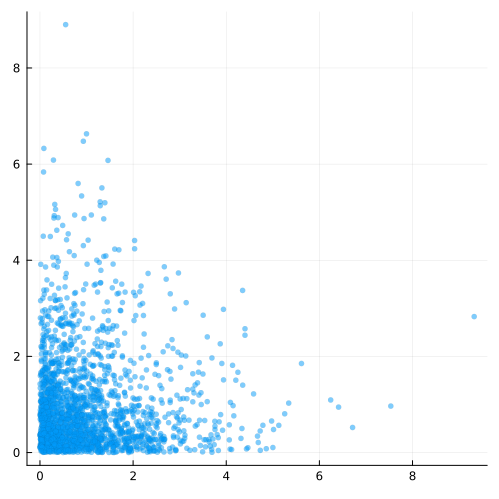

In [16]:
using Plots #Plotsパッケージ
using Random #Randomパッケージ

D=randexp(2000)
R=randexp(2000)
M=[R[i] for i=1:length(D)]
N=[D[i] for i=1:length(D)]

scatter(M,N,legend=false, msw=0, ms=3, alpha=0.5, size=(500, 500))

In [17]:
n=1000000 #100万回
k=0
for i=1:n
    a1=randexp(2);a2=randexp(2);a3=randexp(2) #3点ランダムにとる。
    x1=a2-a1;x2=a3-a1;t1=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 1つ目の角のcos
    x1=a1-a2;x2=a3-a2;t2=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 2つ目の角のcos
    x1=a1-a3;x2=a2-a3;t3=(x1[1]*x2[1]+x1[2]*x2[2])/(sqrt(x1[1]^2+x1[2]^2)*sqrt(x2[1]^2+x2[2]^2))# 3つ目の角のcos
    if t1>0.0000001  && t2>0.0000001 && t3>0.0000001 # 3つの角が鋭角という条件
        k+=1 # 条件を満たしたらカウントする。
    end
end
a=k*100/n
println(a,"%")

21.5307%


# 鋭角三角形の確率　まとめ

|平面上|円周上|一様乱数もどき|一様乱数|正方形|正規乱数|指数乱数|
|---|---|---|---|---|---|---|
|0%|25.0061%|24.2544%|28.1023%|27.5414%|25.0154%|21.4854%|